In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 导入数据集

In [2]:
import pandas as pd
df=pd.read_excel('分类数据集.xlsx')
X,y=df.iloc[:,:-1],df.iloc[:,-1]# X有12个特征，y有4列

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023,shuffle=True)

## 第一节 [感知机](https://scikit-learn.org.cn/view/384.html)

In [4]:
from sklearn.linear_model import Perceptron
p=Perceptron(eta0=1,#学习率
            fit_intercept=True#是否拟合偏置
            )
p.fit(X_train,y_train)
p.score(X_test,y_test)#测试集的准确度
w=p.coef_#加权系数
b=p.intercept_#偏置

## 第二节 [逻辑回归](https://scikit-learn.org.cn/view/378.html)

In [5]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',#求解器,可选值与适用条件见下表
                     fit_intercept=True,#是否拟合偏置
                     )
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

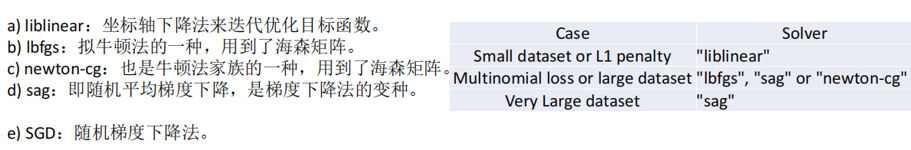

In [6]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss='hinge'#log是逻辑回归，hinge是SVM
                         )

## 第三节 [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [7]:
from sklearn.svm import SVC
svc_rbf=SVC(kernel='rbf',C=1,gamma='auto')#default=rbf
svc_linear=SVC(kernel='linear',C=1)
svc_poly=SVC(kernel='poly',C=1,degree=3,gamma='auto',coef0=0)#degree多项式的阶数，coef为公式中的r
svc_sigmoid=SVC(kernel='sigmoid',C=1,gamma='auto',coef0=0)#
svc=SVC(class_weight=None,decision_function_shape='ovo')
#class_weight
#default=None,在SVC中，将类i的参数C设置为class_weight [i] * C。
#如果没有给出值，则所有类都将设置为单位权重。
#“balanced”模式使用y的值自动将权重与类频率成反比地调整为n_samples / (n_classes * np.bincount(y))
#decision_function_shape
#Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, 
#or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). 
#However, note that internally, one-vs-one (‘ovo’) is always used as a multi-class strategy to train models; 
#an ovr matrix is only constructed from the ovo matrix. The parameter is ignored for binary classification.

In [ ]:
![image-3.png](attachment:image-3.png)

In [ ]:
## 第四节 [贝叶斯](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

In [8]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
mnb=MultinomialNB(alpha=1)#拉普拉斯平滑系数lambda[多项式分布]
gnb=GaussianNB()#高斯分布
bnb=BernoulliNB()#伯努利分布

In [ ]:
#### 导入 新闻数据的方案 

In [9]:
#方法1
#从sklearn.datasets里导入新闻数据抓取器fetch_20newsgroups
# from sklearn.datasets import fetch_20newsgroups
# # 与之前预存的数据不同，fetch_20newsgroups需要从互联网下载。
# news= fetch_20newsgroups(subset='all’)
# # print(len(news.data))
#方法2
# file= "./20news‐bydate‐train/talk.religion.misc/84124"
# with open(file,encoding='latin1') as f:
#     text = []
#     line=f.readline()
#     while line:
#         text.append(line)
#         line=f.readline()

In [ ]:
## 第五节 [KNN](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)

In [ ]:
#### 距离的度量 

In [10]:
from sklearn.neighbors import DistanceMetric
X_=[[0,1,2],[3,4,5]]
dist=DistanceMetric.get_metric('minkowski',p=2)#实例化
dist.pairwise(X_)#计算距离

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [ ]:
![image.png](attachment:image.png)

In [ ]:
#### KNN 

In [11]:
from sklearn.neighbors import KNeighborsClassifier#最近邻按个数
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,
                        weights='distance',#和样本距离小的邻居权值大，和样本距离大的邻居权值则相对较小。
                        algorithm='brute'#可选kd_tree,
                        )
knc=KNeighborsClassifier(algorithm='kd_tree',#可选kd_tree,ball_tree’
                        leaf_size=30
                        )
from sklearn.neighbors import RadiusNeighborsClassifier#最近邻按半径
rnc=RadiusNeighborsClassifier(radius=1,metric='minkowski',p=2)

In [ ]:
# 第六节 [决策树](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',#entropy,log_loss
                           min_impurity_decrease=0.0#不纯度阈值
                          )
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
#                                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                                           max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                           class_weight=None, ccp_alpha=0.0)

In [13]:
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = export_graphviz(dtc, out_file=None,
# feature_names = ,
# class_names= ,
# filled=True, rounded=True, 
# special_characters=True) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("file_name.pdf"）

# 第七节 [集成学习]()

In [14]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,
                       learning_rate=1.0,algorithm='SAMME.R',random_state=None)
gbc = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60,max_depth=7,min_samples_leaf =60,
                                 min_samples_split =1200,max_features='sqrt',random_state=10)
# bc=BaggingClassifier(base_estimator=None, n_estimators=10, 
#                         max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, 
#                         oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
# rfc=RandomForestClassifier(n_estimators=10, criterion=’gini’, 
# max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, 
# min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
# oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)